# 171027 

## 1

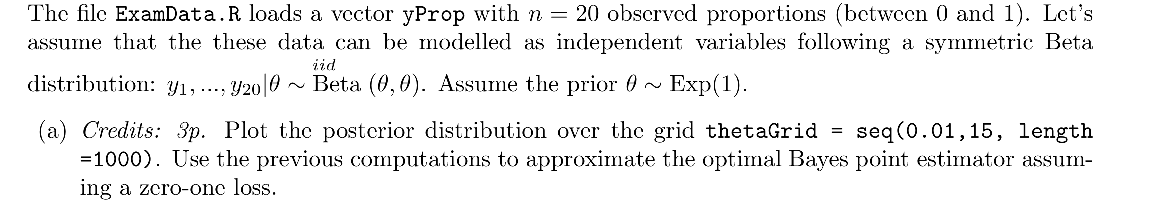

In [3]:
source('ExamData.R')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
par(family  = "Arial")
#install.packages("showtext")
library(showtext)
showtext_auto()
options(repr.plot.width=5, repr.plot.height=5)

In [10]:
 thetaGrid = seq(0.01,15, length=1000)
bandwidth = thetaGrid[2] - thetaGrid[1]

In [6]:
yProp

[1] 0.4355251 0.6256249 0.4644826 0.4421889 0.4901294 0.5011728 0.6738515
 [8] 0.3930268 0.6862443 0.6799029 0.2208123 0.3770972 0.3521602 0.3828586
[15] 0.5368337 0.4590285 0.6343570 0.3394659 0.5046614 0.4588016

In [35]:
logPosterior <- function(theta,yProb){
    logprior = dexp(theta, rate = 1, log = TRUE)
    loglike = sum(log((dbeta(x = yProp,shape1 = theta,shape2 = theta))))
    return(  logprior + loglike)
}

In [40]:
post = numeric(length (thetaGrid))
for(i in 1:length(thetaGrid)){
    post[i] = logPosterior(thetaGrid[i], yProp)
}

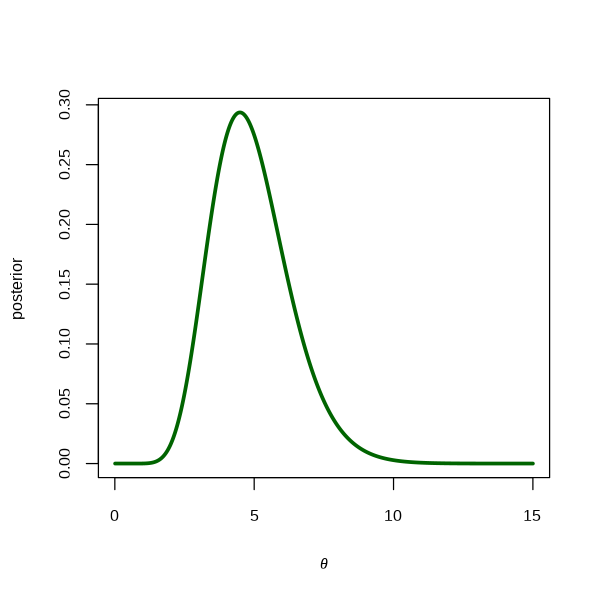

In [53]:
plot(x=thetaGrid,y=(1/bandwidth)*exp(post)/sum(exp(post)),col='darkgreen',type = 'l',
     lwd=3,ylab='posterior',xlab = expression(theta))

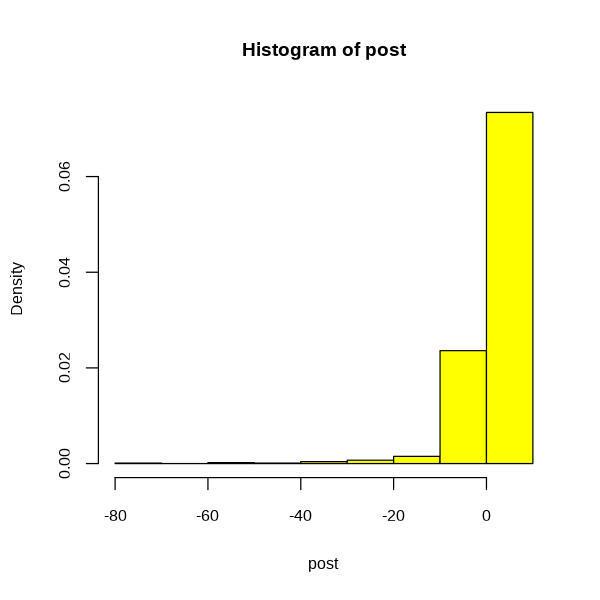

In [46]:
hist(post,freq= FALSE,col="yellow")

#### for zero-one loss mod is the best point estimator

In [49]:
thetaGrid[which.max(post)]

[1] 4.481491

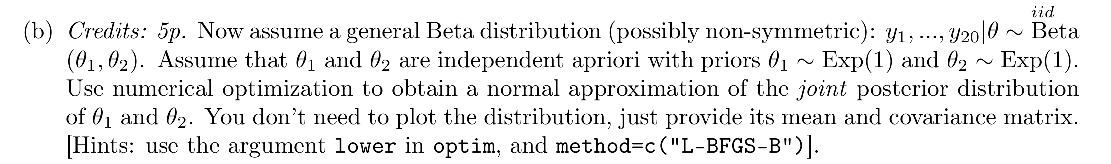

In [54]:
pstNor = function(param,data){
    theta1=param[1]
    theta2=param[2]
    post = sum(log(dbeta(x = data,shape1 = theta1,shape2 = theta2))) + dexp(x = theta1,rate = 1,log=TRUE)+ 
    dexp(x = theta2,rate = 1,log=TRUE)
}

In [55]:
initVal = c(1,1)
OptRes = optim(par = initVal,fn = pstNor,gr = NULL,yProp,method = c("L-BFGS-B"),control = list(fnscale = -1),
               hessian = TRUE,lower=c(-1,-1))

In [57]:
meanPost = OptRes$par
cat("mean \n", meanPost)

mean 
 3.13638 3.337689

In [60]:
Covs = -solve(OptRes$hessian)
cat("\n covariance matrix: \t \n")
print(Covs)


 covariance matrix: 	 
          [,1]      [,2]
[1,] 0.9151830 0.8402569
[2,] 0.8402569 1.0463493


 The posterior is approximately c(theta1,theta2) ~ N(meanPost, Covs).

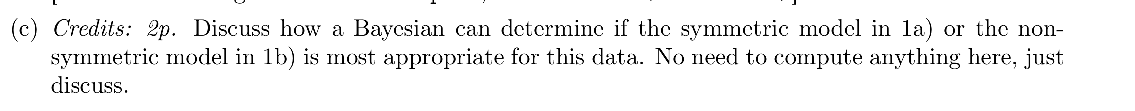

### 1c)
#### - Bayesian model comparison, Bayes factor (marginal likelihood) or posterior model probabilities for comparing the model in 1a to 1b. 
#### - Log predictive score is another possibility, but data is limited here so we don't want to waste much of it for training the prior.
      